**<center><h1>Work Life Integration</h1></center>**

<center><img src="https://th.bing.com/th/id/R8bedee065ce3b96c866fa47b7d25dc4b?rik=W%2fji1U%2f%2bRUp0kA&riu=http%3a%2f%2fresearch.tamu.edu%2fwp-content%2fuploads%2f2015%2f07%2fwhy-humans-fatigue-1.jpg&ehk=%2fNM3%2bF0yK6kDKQOlnZqArg3AjL%2fO%2fz%2bhEAUZOksLGPc%3d&risl=&pid=ImgRaw" 
width="600" height="240" />

---
# **Table of Contents**
---

1. [Problem Statement](#Section1)<br>
2. [Data Loading and Description](#Section2)
3. [Data Profiling](#Section3)
    - 3.1 [Understanding the Dataset](#Section301)<br/>
4. [Exploratory Data Analysis](#Section4)
5. [Encoding and Train Test Split the data](#Section5)<br/>  
6. [Fitting The Regression Models](#Section6)<br/>  
7. [Hyper Paramter Tuning](#Section7)<br/>
8. [Ensemble Learning](#Section8)<br/>
    - 8.1 [Boosting Models](#Section801)<br/>
    - 8.2 [Hyper Tuning Boosting Model](#Section802)<br/>
    - 8.3 [Comparing Trained Models](#Section803)<br/>
    - 8.3 [Stacking Models](#Section804)<br/>
9. [Predictions](#Section9)<br/>

<a name=Section1></a>
 ## 1.  Problem Statement
 
**Content:** 
According to a global survey, about 450 million people live with mental disorders, including anxiety, depression, that can be one of the primary causes of poor health, stress and disability worldwide. In the current virtual scenario, it becomes very crucial for employers to know the mental health of their employees as this directly impacts productivity of the company or workflow and also influences team and workplace culture. To assess and understand the situation across the company, a survey was rolled out to the employees of XyX corporation last year. The responses to the survey are provided along with the ‘mental fatigue’ score which was computed for each employee.

**Problem Statement:** 
You need to review survey results of last year and the ‘Mental fatigue score’ computed for each employee. This data is provided to you in the form of train.csv. We want to understand and observe the change in mental health parameters of all the employees in the XyX corporation. Therefore, we want to predict the mental fatigue score of employees this year based on the provided features and helping XyX corporation to take appropriate corrective steps for their employees.


<a name=Section2></a>
 ## 2. Data Loading and Description

The dataset comprises of 768 observations of 9 columns. Below is a table showing names of all the columns and their description.

| Columns	                       |Description
| -------------                    |:-------------                                 :| 
| Employee ID                      |Unique identifier of the employee
| Date Of Joining                  |Date on which the employee joined the company
| Gender                           |Gender of the employee
| Company Type                     |Type of company [eg: Service based, Product based, etc.]
| WFH Setup Available              |Whether proper work from home setup is available or not 
| Age                              |Age of employee
| Tenure                           |Number of years in the organization
| Vacations taken                  |Number of vacations taken
| Designation                      |Seniority level of the employee in codes
| Average Hours worked per day     |Hours allocated per day
| Employee Satisfaction Score      |Satisfaction score provided by the employees
| Mental Fatigue Score             |Dependent Variable [ to be predicted ]

#### Importing and Installing Packages

In [ ]:
#!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 245kB 12.1MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 3.2MB 19.0MB/s 
     |████████████████████████████████| 1.1MB 65.6MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 296kB 53.5MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


In [1]:
!pip install catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np      
import math,time        
import datetime
import pickle
from google.colab import files,drive
from datetime import date,timedelta                                        # Importing package numpys (For Numerical Python)
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,HuberRegressor,ElasticNet,PassiveAggressiveRegressor, Lasso, Ridge, Lars,BayesianRidge, SGDRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import xgboost as xgb
import catboost as cb
from sklearn.kernel_ridge import KernelRidge
import lightgbm as ltb
from sklearn.neighbors import KNeighborsRegressor
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [3]:
data_to_load = files.upload()
data = pd.read_csv('train.csv')
print('Data Shape:', data.shape)
data.head()

Saving train.csv to train.csv
Data Shape: (22750, 12)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52


<a name=Section3></a>
 ## 3. Data Profiling
 

<a name=Section301></a>
### 3.1 Understanding the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   22750 non-null  object 
 1   Date of Joining               22750 non-null  object 
 2   Gender                        22750 non-null  object 
 3   Company Type                  22750 non-null  object 
 4   WFH Setup Available           22750 non-null  object 
 5   Age                           22750 non-null  int64  
 6   Tenure                        22750 non-null  int64  
 7   Vacations taken               22750 non-null  int64  
 8   Designation                   22750 non-null  int64  
 9   Average Hours worked per day  21369 non-null  float64
 10  Employee satisfaction score   20633 non-null  float64
 11  Mental Fatigue Score          21739 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


In [5]:
data.describe()

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
count,22750.000000,22750.000000,22750.000000,22750.000000,21369.000000,20633.000000,21739.000000
mean,43.036967,10.499516,5.955341,2.178725,4.481398,5.728188,0.449656
std,12.931466,5.776066,3.736712,1.135145,2.047211,1.920839,0.200365
min,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,5.000000,3.000000,1.000000,3.000000,4.600000,0.310000
50%,43.000000,10.000000,6.000000,2.000000,4.000000,5.900000,0.450000
75%,54.000000,16.000000,9.000000,3.000000,6.000000,7.100000,0.590000
max,65.000000,20.000000,12.000000,5.000000,10.000000,10.000000,1.000000


<a name=Section4></a>
## 4. Exploratory Data Analysis

In [6]:
data.isnull().sum()

Employee ID                        0
Date of Joining                    0
Gender                             0
Company Type                       0
WFH Setup Available                0
Age                                0
Tenure                             0
Vacations taken                    0
Designation                        0
Average Hours worked per day    1381
Employee satisfaction score     2117
Mental Fatigue Score            1011
dtype: int64

__Dropping the Employee ID column and converting the Date of Joining to datetime__

In [7]:
data.drop(['Employee ID'],axis=1,inplace=True)

In [8]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])

In [9]:
# convert objects to category
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = data[col].astype('category')

In [10]:
# get missing percent for each feature
def checknull():
  for col in data.columns:
    if data[col].isnull().sum()>0:
      print('% missing values in',col,np.round(data[col].isnull().sum()/data.shape[0]*100,decimals=2),'%')

In [11]:
#drop missing values in mental fatigue, Average Hours worked per day, Employee satisfaction score
s= data.shape[0]
print('before',s)
data.dropna(subset=['Mental Fatigue Score','Average Hours worked per day','Employee satisfaction score'],inplace=True)
total = s-data.shape[0]
print('dropped',total)
print('% null dropped in data',np.round(total/s*100,decimals=2),'%')

before 22750
dropped 4080
% null dropped in data 17.93 %


In [12]:
checknull()

__Observations:__
- Mental Fatigue target variable has 4.44% missing values which are dropeed
- Avg Work hrs per day and Emp satisfaction score have missing values implying missing data not at random(MNAR)
- Missing Values are dropped which was about 18%

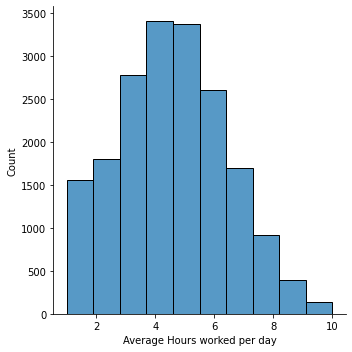

In [13]:
sns.displot(data=data['Average Hours worked per day'],kde=False,bins=10)

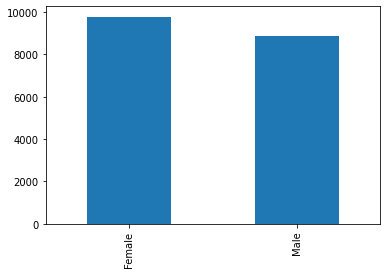

In [14]:
data['Gender'].value_counts().plot(kind='bar')

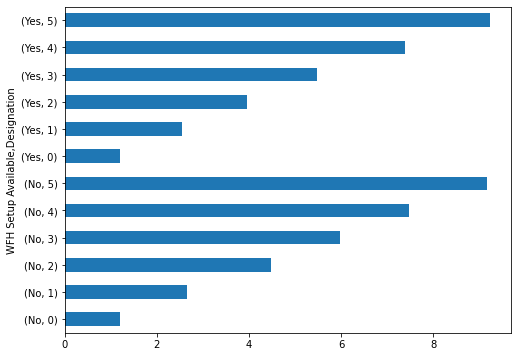

In [15]:
plt.figure(figsize=(8,6))
data.groupby(['WFH Setup Available','Designation'])['Average Hours worked per day'].mean().plot(kind='barh')

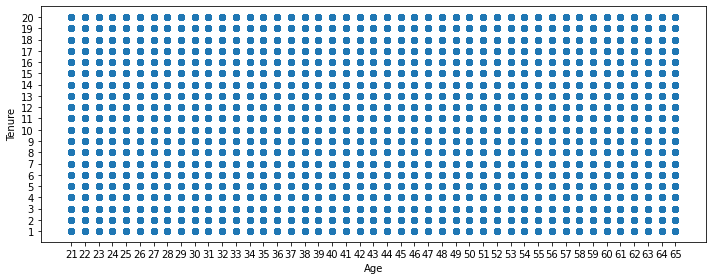

In [16]:
fig, ax = plt.subplots(figsize = (10,4))
plt.scatter(x=data.Age,y=data.Tenure)
ax.set_xticks(np.arange(21,66))
ax.set_yticks(np.arange(1,21))
ax.set_xlabel('Age')
ax.set_ylabel('Tenure')

fig.tight_layout()

plt.show()

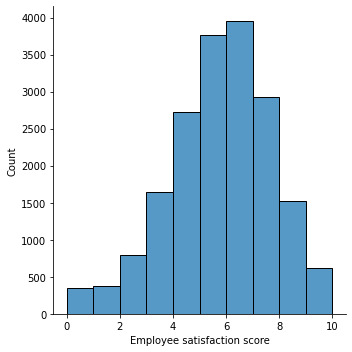

In [17]:
sns.displot(data=data['Employee satisfaction score'],kde=False,bins=10)

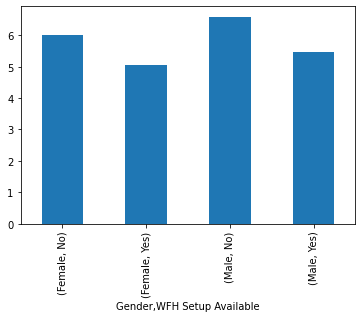

In [18]:
data.groupby(['Gender','WFH Setup Available'])['Employee satisfaction score'].mean().plot(kind='bar')

__Analysing correlation between independent variables__

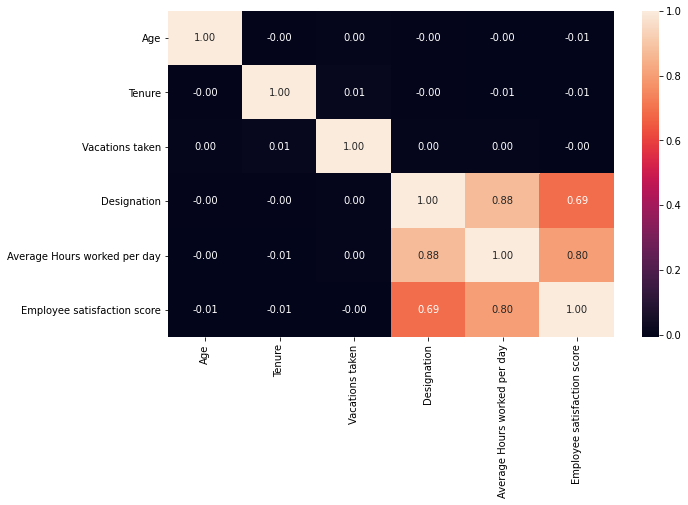

In [19]:
corr = data.drop(['Mental Fatigue Score'],axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,annot=True,fmt='.2f')

In [20]:
data.drop(['Date of Joining','Age','Tenure','Vacations taken','Company Type'],axis=1,inplace=True)
data.head()

,Gender,WFH Setup Available,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,Female,No,2,3.0,3.8,0.16
1,Male,Yes,1,2.0,5.0,0.36
3,Male,Yes,1,1.0,2.6,0.20
4,Female,No,3,7.0,6.9,0.52
5,Male,Yes,2,4.0,3.6,0.29


__Observations:__
- Age and Tenure do not show a meaningfull relation for employees age and experience, and thus will be dropped.
- Date of joining for all employees are in the same year and not helpful for predictions and so will be dropped.
- Company type do no show any significance in terms of working pattern of employess and is dropped.
-Vacations taken do have any importance in correlation and will not be considered.


<a name=Section5></a>
## 5. Encoding and Train Test Split the data

In [21]:
# using onehot encoding on Cat features
def ApplyOneHot(data,feature):
  data_dum = pd.get_dummies(data[feature],drop_first=True,prefix=feature)
  data = pd.concat([data,data_dum],axis=1)
  data.drop(feature,inplace=True,axis=1)
  return data

In [22]:
data_uncorr = data.copy()

In [23]:
for col in data_uncorr.select_dtypes(include='category').columns:
  data_uncorr =ApplyOneHot(data_uncorr,col)
data_uncorr.head()

,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Gender_Male,WFH Setup Available_Yes
0,2,3.0,3.8,0.16,0,0
1,1,2.0,5.0,0.36,1,1
3,1,1.0,2.6,0.20,1,1
4,3,7.0,6.9,0.52,0,0
5,2,4.0,3.6,0.29,1,1


In [24]:
#Train test split
X = data_uncorr.drop(['Mental Fatigue Score'],axis=1)
y = data_uncorr['Mental Fatigue Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print('Train and Test',X_train.shape,X_test.shape)

Train and Test (14936, 5) (3734, 5)


<a name=Section6></a>
## 6. Fitting The Regression Models

**Fitting and training the data on several popular Linear Regressor models and comparing the accuracy and RMSE**

In [26]:
def model_train_list(model_list):
  # Create an empty list to append scores and Regressor name
  train_scores = []
  test_scores = []
  rmse_test = []
  rmse_train = []
  reg_names = []

  # Train Regressor over train data and append scores to empty list
  for reg in model_list:
    # Fit the train data over the Regressor object
    start = time.time()
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test) 
    y_predict_tr = reg.predict(X_train)  
    end = time.time()
    # Append train and test score to the empty list
    train_scores.append(reg.score(X_train, y_train))
    test_scores.append(reg.score(X_test, y_test))
    rmse_train.append(math.sqrt(mean_squared_error(y_train,y_predict_tr)))
    rmse_test.append(math.sqrt(mean_squared_error(y_test,y_predict)))               
    reg_names.append(reg.__class__.__name__)
    print(reg.__class__.__name__,':',np.round(end-start,decimals=2),'secs \n')
  #Create an accuracy dataframe from scores and names list
  accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores, 'Train RMSE': rmse_train,
                                    'Test RMSE':rmse_test}, index=reg_names)
  #View the accuracy of all the regressors
  return accuracy_frame.round(5)

In [27]:
def model_fit_predict(model):
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test) 
  y_predict_tr = model.predict(X_train)  
  rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
  rmse_train = math.sqrt(mean_squared_error(y_train,y_predict_tr))
  # Append train and test score to the empty list
  accuracy_frame = pd.DataFrame(data={'Accuracy': [model.score(X_train, y_train),model.score(X_test, y_test)], 
                                      'RMSE': [rmse_train,rmse_test]}, 
                                      index=['Train','Test'])

  print(accuracy_frame.round(5))

In [28]:
# Initialize Regressors
lr   = LinearRegression()
svr  = SVR()
dt   = DecisionTreeRegressor(random_state = 42)
rf   = RandomForestRegressor(random_state = 42)
ls   = Lasso(random_state = 42)
knn  = KNeighborsRegressor()
kr   = KernelRidge()
en   = ElasticNet()
par  = PassiveAggressiveRegressor(random_state=42)
br   = BayesianRidge()
lar  = Lars()
rd   = Ridge(random_state=42)
sgd  = SGDRegressor(random_state=42)

In [ ]:
# Train the list of Regressor objects
%%time
reg_list = [lr, lar, ls, rd, br, kr, en, dt, rf, svr, knn, par, sgd]
accuracy_frame = model_train_list(reg_list)

LinearRegression : 0.03 secs 

Lars : 0.01 secs 

Lasso : 0.01 secs 

Ridge : 0.01 secs 

BayesianRidge : 0.01 secs 

KernelRidge : 35.71 secs 

ElasticNet : 0.01 secs 

DecisionTreeRegressor : 0.03 secs 

RandomForestRegressor : 1.68 secs 

SVR : 1.66 secs 

KNeighborsRegressor : 0.2 secs 

PassiveAggressiveRegressor : 0.01 secs 

SGDRegressor : 0.02 secs 

CPU times: user 1min 9s, sys: 3.67 s, total: 1min 13s
Wall time: 41 s


In [ ]:
accuracy_frame.sort_values(by=['Test Accuracy'],ascending=False)

,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
LinearRegression,0.89733,0.89817,0.06366,0.06489
Lars,0.89733,0.89817,0.06366,0.06489
Ridge,0.89733,0.89817,0.06366,0.06489
BayesianRidge,0.89733,0.89817,0.06366,0.06489
SGDRegressor,0.89412,0.89545,0.06465,0.06575
RandomForestRegressor,0.92589,0.89088,0.05409,0.06717
SVR,0.88921,0.88886,0.06613,0.06779
KNeighborsRegressor,0.91304,0.88697,0.05859,0.06836
PassiveAggressiveRegressor,0.88599,0.88666,0.06708,0.06846
KernelRidge,0.88418,0.88661,0.06761,0.06847


- *LinearRegression* is the best model from all the other model in terms of high accuracy and low RMSE.
- Hyper tuning of the models BayesianRidge, SGDRegressor, RandomForestRegressor, SVR, KNeighborsRegressor, KernelRidge

<a name=Section7></a>
## 7. Hyper Paramter Tuning

<a name=Section701></a>
### 7.1 Random Forest

The Random Forest Model will be tuned using __RandomSearch__ for better rmse score
and to reduce the overfitting

In [ ]:
# parameters for RandomSearchCV
# Number of trees in random forest
n_estimators = [10,20,50,100,200,300]
# Number of features to consider at every split
max_features = ['auto','log2','sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8,10]
max_depth.append(None)
param_dist = {'n_estimators': n_estimators,
               'criterion': ['mse','mae'],
               'max_depth': max_depth,
               'min_samples_split': range(3, 11),
               'min_samples_leaf': range(1, 5),
               'max_features': max_features,
               'bootstrap':[True,False]
               }
# run randomized search
n_iter_search = 50

seed =13
kfold= KFold(n_splits=3,shuffle=True,random_state=seed)

rf_CV = RandomizedSearchCV(estimator = rf, param_distributions = param_dist,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#rf_CV.fit(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 43.9min finished


CPU times: user 15.8 s, sys: 6.05 s, total: 21.8 s
Wall time: 43min 53s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0....
                   iid='deprecat

In [ ]:
print('Best R2:',rf_CV.best_score_)
print('Best Parameters:',rf_CV.best_params_)

Best R2: 0.9040884398696831
Best Parameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'mse', 'bootstrap': True}


In [29]:
rf_r2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=8, max_features=None, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=3,
                        min_samples_split=5, min_weight_fraction_leaf=0.0,
                        n_estimators=500, n_jobs=-1, oob_score=False,
                        random_state=42, verbose=0, warm_start=False)

In [ ]:
%%time
print(rf_r2.__class__.__name__,"Accuracy tuned:")
model_fit_predict(rf_r2)

RandomForestRegressor Accuracy tuned:
       Accuracy     RMSE
Train   0.91069  0.05937
Test    0.90405  0.06299
CPU times: user 2.69 s, sys: 13.5 ms, total: 2.71 s
Wall time: 2.71 s


<a name=Section702></a>
### 7.2 SVR

In [ ]:
# Parameters for tuning
parameters = [
              {'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': [1,3,5,7,10]
               }
              ]

# run randomized search
n_iter_search = 50
#neg_root_mean_squared_error
svr_CV = RandomizedSearchCV(estimator = svr, param_distributions = parameters,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
%%time
#svr_CV.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


CPU times: user 3.36 s, sys: 441 ms, total: 3.8 s
Wall time: 2min 21s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [1, 3, 5, 7, 10],
                                         'gamma': [0.0001, 0.001, 0.01, 0.1,
                                                   0.2, 0.5, 0.6, 0.9],
                                         'kernel': ['rbf']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=2)

In [ ]:
svr_CV.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
svr_r2 = SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
%%time
print(svr_r2.__class__.__name__,"Accuracy tuned:")
model_fit_predict(svr_r2)

SVR Accuracy tuned:
       Accuracy     RMSE
Train   0.90595  0.06093
Test    0.90454  0.06283
CPU times: user 33.8 s, sys: 47 ms, total: 33.8 s
Wall time: 33.7 s


<a name=Section703></a>
### 7.3 KNeighbors Regressor

In [ ]:
# parameters for RandomSearchCV
l_neigbours = list(np.arange(4,100,1))
param_grid = [{'n_neighbors':l_neigbours,
               'weights':['uniform','distance']}]
# run randomized search
n_iter_search = 100
#neg_root_mean_squared_error
knn_CV = GridSearchCV(estimator = knn, param_grid = param_grid,
                                  cv= kfold, verbose = 2,
                                  n_jobs = -1,scoring='r2')

In [ ]:
%%time
#knn_CV.fit(X,y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   54.5s


CPU times: user 5.22 s, sys: 512 ms, total: 5.73 s
Wall time: 1min 47s


[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                          15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33, ...],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=2)

In [ ]:
print('Best R2:',knn_CV.best_score_)
print('Best Parameters:',knn_CV.best_params_)

Best R2: 0.9013638174048224
Best Parameters: {'n_neighbors': 33, 'weights': 'uniform'}


In [ ]:
knn_CV.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                    weights='uniform')

In [31]:
knn_r2 = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [ ]:
%%time
print(knn_r2.__class__.__name__,"Accuracy tuned:")
model_fit_predict(knn_r2)

KNeighborsRegressor Accuracy tuned:
       Accuracy     RMSE
Train   0.90751  0.06042
Test    0.90237  0.06354
CPU times: user 960 ms, sys: 7.05 ms, total: 967 ms
Wall time: 967 ms


<a name=Section704></a>
### 7.4 Ridge

In [ ]:
param_grid = {
    'alpha':list(range(1,500,1))
    }
# run randomized search
n_iter_search = 500
#neg_root_mean_squared_error
rd_CV = RandomizedSearchCV(estimator = rd, param_distributions = param_grid,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#rd_CV.fit(X,y)

Fitting 3 folds for each of 499 candidates, totalling 1497 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 499 is smaller than n_iter=500. Running 499 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.5s


CPU times: user 1.9 s, sys: 181 ms, total: 2.08 s
Wall time: 9.78 s


[Parallel(n_jobs=-1)]: Done 1497 out of 1497 | elapsed:    9.8s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=42, solver='auto', tol=0.001),
                   iid='deprecated', n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=2)

In [ ]:
print('Best R2:',rd_CV.best_score_)
print('Best Parameters:',rd_CV.best_params_)

Best R2: 0.8974765256915864
Best Parameters: {'alpha': 15}


In [ ]:
rd_CV.best_estimator_

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [ ]:
rd_r2 = Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [ ]:
%%time
print(rd_r2.__class__.__name__,"Accuracy tuned:")
model_fit_predict(rd_r2)

Ridge Accuracy tuned:
       Accuracy     RMSE
Train   0.89733  0.06366
Test    0.89818  0.06489
CPU times: user 22 ms, sys: 19.1 ms, total: 41.1 ms
Wall time: 32.3 ms


<a name=Section705></a>
### 7.5 Kernel Ridge

In [32]:
kr_r2  = KernelRidge(alpha=3, kernel='polynomial', degree=4)

In [ ]:
%%time
model_fit_predict(kr_r2)

       Accuracy     RMSE
Train   0.90542  0.06110
Test    0.90467  0.06279
CPU times: user 2min 29s, sys: 6.06 s, total: 2min 35s
Wall time: 1min 57s


<a name=Section706></a>
### 7.6 Decision Trees Regressor

In [ ]:
# parameters for RandomSearchCV

# Number of features to consider at every split
max_features = ['auto','log2','sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8]
max_depth.append(None)
param_dist = {
               'criterion': ['mse','mae'],
               'max_depth': max_depth,
               'min_samples_split': range(3, 11),
               'min_samples_leaf': range(1, 5),
               'max_features': max_features
               
               }
# run randomized search
n_iter_search = 50

seed =13
kfold= KFold(n_splits=3,shuffle=True,random_state=seed)

dt_CV = RandomizedSearchCV(estimator = dt, param_distributions = param_dist,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#dt_CV.fit(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.5s


CPU times: user 1.1 s, sys: 78.9 ms, total: 1.18 s
Wall time: 55.2 s


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   55.1s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                              

In [ ]:
print('Best R2:',dt_CV.best_score_)
print('Best Parameters:',dt_CV.best_params_)

Best R2: 0.9010501213237937
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'mse'}


In [ ]:
dt_CV.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [33]:
dt_r2 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
%%time
model_fit_predict(dt_r2)

       Accuracy     RMSE
Train   0.90811  0.06022
Test    0.90096  0.06400
CPU times: user 30.2 ms, sys: 1.01 ms, total: 31.2 ms
Wall time: 34.1 ms


<a name=Section707></a>
### 7.7 BayesianRidge

In [ ]:
# parameters for RandomSearchCV
list_para = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
param_grid = {
    'alpha_1': list_para,
    'alpha_2':list_para,
    'lambda_1': list_para,
    'lambda_2': list_para
}

# run randomized search
#n_iter_search = 100
#neg_root_mean_squared_error
br_CV = GridSearchCV(estimator = br, param_grid = param_grid,
                                  cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#br_CV.fit(X,y)

Fitting 3 folds for each of 83521 candidates, totalling 250563 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2332 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 5580 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 10108 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 15948 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 23068 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 31500 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 41212 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 52236 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 64540 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 78156 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 93052 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 109260 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 126748 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 14

CPU times: user 5min 3s, sys: 15 s, total: 5min 18s
Wall time: 27min 5s


GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': [1e-...
                                     1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 10],
                         'lambda_1': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10,
                                      1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                      0.001, 0.0

In [ ]:
print('Best R2:',br_CV.best_score_)
print('Best Parameters:',br_CV.best_params_)

Best R2: 0.897476442540353
Best Parameters: {'alpha_1': 1e-15, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 0.01}


In [ ]:
br_CV.best_estimator_

BayesianRidge(alpha_1=1e-15, alpha_2=10, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=True, lambda_1=10, lambda_2=0.01,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [34]:
br_r2 = BayesianRidge(alpha_1=1e-15, alpha_2=10, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=True, lambda_1=10, lambda_2=0.01,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [ ]:
%%time
model_fit_predict(br_r2)

       Accuracy     RMSE
Train   0.89733  0.06366
Test    0.89818  0.06489
CPU times: user 22.2 ms, sys: 15.9 ms, total: 38 ms
Wall time: 24.4 ms


<a name=Section708></a>
### 7.8 SGDRegressor

In [ ]:
# parameters for RandomSearchCV

param_grid = {
    'penalty':['l2', 'l1', 'elasticnet'],
              'alpha':[0.0001,0.001,0.01,0.1,1],
              'learning_rate':['constant','optimal','invscaling','adaptive']
              }

#neg_root_mean_squared_error
sgd_CV = GridSearchCV(estimator = sgd, param_grid = param_grid,
                                  cv= 5, verbose = 2,
                                  n_jobs = -1,scoring='r2')

In [ ]:
%%time
#sgd_CV.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.1s


CPU times: user 1.67 s, sys: 4.31 s, total: 5.97 s
Wall time: 40.3 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   40.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=42, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             

In [ ]:
sgd_CV.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
sgd_r2 = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
%%time
model_fit_predict(sgd_r2)

       Accuracy     RMSE
Train   0.89733  0.06366
Test    0.89817  0.06489
CPU times: user 50.9 ms, sys: 15.3 ms, total: 66.2 ms
Wall time: 57.4 ms


<a name=Section8></a>
## 8. Ensemble Learning

__Training the data set on Boosting, Bagging, Voting and Stacking technique to measure the accuracy__

<a name=Section801></a>
### 8.1 Boosting Models

In [36]:
ada_reg = AdaBoostRegressor(random_state=42)
gb_reg  = GradientBoostingRegressor(random_state = 42)
xg      = xgb.XGBRegressor(random_state=42)
cat     = cb.CatBoostRegressor(random_state=42)
lgb     = ltb.LGBMRegressor(random_state=42)
etr     = ExtraTreesRegressor(random_state=42)
boost_list = [ada_reg,gb_reg,xg,lgb,etr,cat]

In [ ]:
%%time
accuracy_frame=model_train_list(boost_list)

AdaBoostRegressor : 0.19 secs 

GradientBoostingRegressor : 0.68 secs 

[08:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 0.55 secs 

LGBMRegressor : 0.26 secs 

ExtraTreesRegressor : 1.69 secs 

Learning rate set to 0.063156
0:	learn: 0.1882354	total: 2.73ms	remaining: 2.73s
1:	learn: 0.1787186	total: 5.23ms	remaining: 2.61s
2:	learn: 0.1696462	total: 7.96ms	remaining: 2.65s
3:	learn: 0.1611215	total: 10.7ms	remaining: 2.67s
4:	learn: 0.1532094	total: 13.5ms	remaining: 2.69s
5:	learn: 0.1459494	total: 16.4ms	remaining: 2.71s
6:	learn: 0.1393249	total: 19.3ms	remaining: 2.73s
7:	learn: 0.1330000	total: 22.2ms	remaining: 2.76s
8:	learn: 0.1270745	total: 25.1ms	remaining: 2.76s
9:	learn: 0.1215179	total: 27.9ms	remaining: 2.76s
10:	learn: 0.1164019	total: 30.6ms	remaining: 2.75s
11:	learn: 0.1118803	total: 33.3ms	remaining: 2.74s
12:	learn: 0.1075897	total: 36.1ms	remaining: 2.74s
13:	learn: 0.103

In [ ]:
accuracy_frame.sort_values(by=['Test Accuracy'],ascending=False)

,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
LGBMRegressor,0.91167,0.90411,0.05905,0.06297
GradientBoostingRegressor,0.90567,0.90394,0.06102,0.06302
XGBRegressor,0.90573,0.90380,0.06100,0.06307
CatBoostRegressor,0.91568,0.90159,0.05769,0.06379
ExtraTreesRegressor,0.92730,0.88473,0.05357,0.06904
AdaBoostRegressor,0.75895,0.76287,0.09754,0.09902


**LGBMRegressor was the fastest and most accurate of all the Boosting models trained.**

<a name=Section802></a>
### 8.2 Hyper Tuning Boosting Model

#### LGBMRegressor

In [ ]:
# parameters for RandomSearchCV
# Number of trees in LGBM
n_estimators = [100,200,300,400,500]
# Maximum number of levels in tree
max_depth = [-1,2,4,6,8,10]
param_grid = {
    'n_estimators': n_estimators,
    'boosting_type':['gbdt'],
    'learning_rate':[0.0,0.05,0.1,0.15,0.2,0.3],
    'colsample_bytree': [0.7,0.8,0.9,1],
    'max_depth': max_depth,
    'num_leaves': [10, 15, 20, 25, 31, 50, 100],
    'reg_alpha': [0.0,0.1,0.2,0.3,0.4,0.5],
    'reg_lambda': [0.0,0.1,0.2,0.3,0.4],
    'min_split_gain': [0.0,0.05,0.1,0.2,0.3,0.4],
    'subsample': [0.7, 0.8, 0.9]
}
# run randomized search
n_iter_search = 300
#neg_root_mean_squared_error
lgbm_CV = RandomizedSearchCV(estimator = lgb, param_distributions = param_grid,
                                  n_iter= n_iter_search, cv= 5,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
%%time
#lgbm_CV.fit(X,y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:  2.0min


CPU times: user 7.88 s, sys: 757 ms, total: 8.64 s
Wall time: 2min 3s


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=42,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=...
                                                          0.2, 0.3],
                                        'max_depth': [-1, 2, 4, 6, 

In [ ]:
print('Best R2:',lgbm_CV.best_score_)
print('Best Parameters:',lgbm_CV.best_params_)

Best R2: 0.9065439341478811
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'num_leaves': 25, 'n_estimators': 100, 'min_split_gain': 0.0, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1, 'boosting_type': 'gbdt'}


In [ ]:
lgbm_CV.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
              importance_type='split', learning_rate=0.05, max_depth=6,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=25, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.2, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [37]:
lgbm_r2 = ltb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
                importance_type='split', learning_rate=0.05, max_depth=6,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=25, objective=None,
                random_state=42, reg_alpha=0.2, reg_lambda=0.2, silent=True,
                subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
%%time
model_fit_predict(lgbm_r2)

       Accuracy     RMSE
Train   0.90837  0.06014
Test    0.90496  0.06269
CPU times: user 387 ms, sys: 8.03 ms, total: 395 ms
Wall time: 398 ms


#### GradientBoostingRegressor

In [ ]:
# parameters for RandomSearchCV
# Number of trees in GBR
n_estimators = [100,200,300,400,500]
# Maximum number of levels in tree
max_depth = [2,4,6,8,10]
max_features = ['sqrt','log2',None]
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate':[0.0,0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split' : range(3,12,2)
}

# run randomized search
n_iter_search = 100
#neg_root_mean_squared_error
gbr_CV = RandomizedSearchCV(estimator = gb_reg, param_distributions = param_grid,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#gbr_CV.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


CPU times: user 7.38 s, sys: 494 ms, total: 7.88 s
Wall time: 6min 31s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                

In [ ]:
print('Best R2:',gbr_CV.best_score_)
print('Best Parameters:',gbr_CV.best_params_)

Best R2: 0.9050256557063171
Best Parameters: {'n_estimators': 300, 'min_samples_split': 11, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.05}


In [ ]:
gbr_CV.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=11,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
gbr_r2 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.05, loss='ls', max_depth=6,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=42, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
%%time
model_fit_predict(gbr_r2)

       Accuracy     RMSE
Train   0.90993  0.05962
Test    0.90444  0.06286
CPU times: user 2.64 s, sys: 8.61 ms, total: 2.65 s
Wall time: 2.65 s


#### XGBRegressor

In [ ]:
# parameters for RandomSearchCV
# Number of trees in XG
n_estimators = [100,200,300,400,500]
# Maximum number of levels in tree
max_depth = [-1,2,4,6,8,10]
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate':[0.0,0.05,0.1,0.15,0.2,0.25,0.3],
    'colsample_bytree': [0.3,0.4,0.5,0.7,0.8,0.9,1],
    'max_depth': max_depth,
    'min_child_weight': [1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'reg_alpha': [0.0,0.1,0.2,0.3,0.4,0.5],
    'reg_lambda': [0.0,0.1,0.2,0.3,0.4],
}
                        
# run randomized search
n_iter_search = 100
#neg_root_mean_squared_error
xg_CV = RandomizedSearchCV(estimator = xg, param_distributions = param_grid,
                                  n_iter = n_iter_search, cv= kfold,
                                  n_jobs = -1,scoring='r2',verbose=2)

In [ ]:
#%%time
#xg_CV.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


[09:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 5.67 s, sys: 472 ms, total: 6.14 s
Wall time: 5min 57s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          obj...
                                                             0.8, 0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.

In [ ]:
print('Best R2:',xg_CV.best_score_)
print('Best Parameters:',xg_CV.best_params_)

Best R2: 0.9048235207884773
Best Parameters: {'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}


In [ ]:
xg_CV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
xg_r2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.0,
               importance_type='gain', learning_rate=0.2, max_delta_step=0,
               max_depth=4, min_child_weight=3, missing=None, n_estimators=200,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
               reg_alpha=0.4, reg_lambda=0.0, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)

In [ ]:
%%time
model_fit_predict(xg_r2)

[09:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
       Accuracy     RMSE
Train   0.91095  0.05929
Test    0.90441  0.06287
CPU times: user 1.38 s, sys: 7.61 ms, total: 1.39 s
Wall time: 1.39 s


#### CatBoostRegressor

In [ ]:
parameters = {
              'loss_function':['MAE','MAPE','RMSE'],
              'depth': [2,4,6,8,10],
              'learning_rate' : [0.001,0.01, 0.05, 0.1],
              'iterations'    : [30,50,100,200,300,400,500]
              }

#neg_root_mean_squared_error
cat_CV = GridSearchCV(estimator = cat, param_grid = parameters,
                                  cv= 5, verbose = 2,
                                  n_jobs = -1,scoring='r2')

In [ ]:
%%time
#cat_CV.fit(X,y)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 16.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 34.4min finished


0:	learn: 0.1910449	total: 56.7ms	remaining: 11.3s
1:	learn: 0.1829873	total: 63.9ms	remaining: 6.32s
2:	learn: 0.1753203	total: 70.6ms	remaining: 4.63s
3:	learn: 0.1680171	total: 77.3ms	remaining: 3.79s
4:	learn: 0.1612908	total: 84.6ms	remaining: 3.3s
5:	learn: 0.1549194	total: 89.6ms	remaining: 2.9s
6:	learn: 0.1488374	total: 96.4ms	remaining: 2.66s
7:	learn: 0.1431176	total: 103ms	remaining: 2.48s
8:	learn: 0.1376698	total: 110ms	remaining: 2.34s
9:	learn: 0.1325359	total: 117ms	remaining: 2.23s
10:	learn: 0.1277749	total: 124ms	remaining: 2.13s
11:	learn: 0.1234149	total: 128ms	remaining: 2s
12:	learn: 0.1191298	total: 134ms	remaining: 1.93s
13:	learn: 0.1151829	total: 141ms	remaining: 1.88s
14:	learn: 0.1114273	total: 148ms	remaining: 1.82s
15:	learn: 0.1079037	total: 155ms	remaining: 1.78s
16:	learn: 0.1045322	total: 162ms	remaining: 1.74s
17:	learn: 0.1013932	total: 168ms	remaining: 1.7s
18:	learn: 0.0984457	total: 181ms	remaining: 1.73s
19:	learn: 0.0958595	total: 184ms	remain

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa56a298f90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8, 10],
                         'iterations': [30, 50, 100, 200, 300, 400, 500],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'loss_function': ['MAE', 'MAPE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=2)

In [ ]:
print('Best R2:',cat_CV.best_score_)
print('Best Parameters:',cat_CV.best_params_)

Best R2: 0.9047784876358071
Best Parameters: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1, 'loss_function': 'RMSE'}


In [40]:
cat_r2 = cb.CatBoostRegressor(depth= 10, iterations= 100, learning_rate= 0.1, loss_function= 'MAE')

In [62]:
%%time
model_fit_predict(cat_r2)

0:	learn: 0.1820986	total: 5.94ms	remaining: 589ms
1:	learn: 0.1667222	total: 12.4ms	remaining: 606ms
2:	learn: 0.1532933	total: 18.7ms	remaining: 605ms
3:	learn: 0.1415535	total: 25.6ms	remaining: 615ms
4:	learn: 0.1308994	total: 31.8ms	remaining: 604ms
5:	learn: 0.1215577	total: 35.6ms	remaining: 558ms
6:	learn: 0.1132537	total: 41.7ms	remaining: 554ms
7:	learn: 0.1060795	total: 47.7ms	remaining: 548ms
8:	learn: 0.0996848	total: 53.7ms	remaining: 543ms
9:	learn: 0.0941457	total: 59.8ms	remaining: 538ms
10:	learn: 0.0894619	total: 65.9ms	remaining: 533ms
11:	learn: 0.0854462	total: 69ms	remaining: 506ms
12:	learn: 0.0817430	total: 75.2ms	remaining: 503ms
13:	learn: 0.0785621	total: 81.4ms	remaining: 500ms
14:	learn: 0.0758673	total: 86.8ms	remaining: 492ms
15:	learn: 0.0737063	total: 89.8ms	remaining: 471ms
16:	learn: 0.0717724	total: 96ms	remaining: 469ms
17:	learn: 0.0701449	total: 102ms	remaining: 465ms
18:	learn: 0.0687658	total: 108ms	remaining: 459ms
19:	learn: 0.0675696	total: 

<a name=Section803></a>
### 8.3 Comparing Trained Models

In [ ]:
Tuned_list = [lr, lar, rd_r2, br_r2, kr_r2, dt_r2, rf_r2, svr_r2, knn_r2, sgd, lgbm_r2, gbr_r2, xg_r2, cat_r2]

In [ ]:
%%time
accuracy_frame = model_train_list(Tuned_list)

LinearRegression : 0.01 secs 

Lars : 0.01 secs 

Ridge : 0.01 secs 

BayesianRidge : 0.01 secs 

KernelRidge : 98.71 secs 

DecisionTreeRegressor : 0.03 secs 

RandomForestRegressor : 2.32 secs 

SVR : 27.36 secs 

KNeighborsRegressor : 0.48 secs 

SGDRegressor : 0.02 secs 

LGBMRegressor : 0.37 secs 

GradientBoostingRegressor : 2.48 secs 

[10:12:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 1.21 secs 

0:	learn: 0.1816576	total: 9.42ms	remaining: 933ms
1:	learn: 0.1666637	total: 15.8ms	remaining: 776ms
2:	learn: 0.1531901	total: 22.3ms	remaining: 720ms
3:	learn: 0.1411212	total: 28.7ms	remaining: 688ms
4:	learn: 0.1305842	total: 34.9ms	remaining: 663ms
5:	learn: 0.1213115	total: 39.4ms	remaining: 618ms
6:	learn: 0.1131127	total: 46.1ms	remaining: 612ms
7:	learn: 0.1061022	total: 52.8ms	remaining: 607ms
8:	learn: 0.0996251	total: 59.6ms	remaining: 603ms
9:	learn: 0.0941957	total: 66.2ms	remainin

In [ ]:
accuracy_frame.sort_values(by=['Test Accuracy'],ascending=False)

,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
CatBoostRegressor,0.91057,0.90501,0.05941,0.06267
LGBMRegressor,0.90838,0.90476,0.06014,0.06275
KernelRidge,0.90542,0.90467,0.06110,0.06279
SVR,0.90595,0.90454,0.06093,0.06283
GradientBoostingRegressor,0.90993,0.90444,0.05962,0.06286
XGBRegressor,0.91095,0.90441,0.05929,0.06287
RandomForestRegressor,0.91069,0.90405,0.05937,0.06299
KNeighborsRegressor,0.90751,0.90237,0.06042,0.06354
DecisionTreeRegressor,0.90811,0.90096,0.06022,0.06400
Ridge,0.89733,0.89818,0.06366,0.06489


Selecting the top 8 candidates for Stacking Regressor and final_estimator as *SGDRegressor*

<a name=Section804></a>
### 8.4 Stacking Models

Adding best accuracy models *CatBoostRegressor*, *LGBMRegressor*, *KernelRidge*, *SVR*, *GradientBoostingRegressor*, *XGBRegressor*, *RandomForestRegressor*, *KNeighborsRegressor* to stack and making **SGD Regressor** as final estimator

In [41]:
# Creating a collection of estimators
estimators = [('CatBoostRegressor', cat_r2), 
              ('LGBMRegressor', lgbm_r2),
              ('KernelRidge',kr_r2),
              ('SVR', svr_r2),
              ('GradientBoostingRegressor', gbr_r2),
              ('XGBRegressor',xg_r2),
              ('RandomForestRegressor',rf_r2),
              ('KNeighborsRegressor',knn_r2)
              ]

# Setting StackingRegressor with initiated estimators and a final estimator
stack_reg = StackingRegressor(estimators=estimators, final_estimator=sgd_r2, n_jobs=-1, cv=5,verbose=2)

In [42]:
%%time
model_fit_predict(stack_reg)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


       Accuracy     RMSE
Train   0.91055  0.05942
Test    0.90571  0.06244
CPU times: user 58.9 s, sys: 2.24 s, total: 1min 1s
Wall time: 5min 31s


In [51]:
drive.mount('/drive') #to save the trained stack reg model

Mounted at /drive


In [52]:
with open('/drive/My Drive/Colab Notebooks/WLI_Reg_Model','wb') as f:
  pickle.dump(stack_reg,f)
f.close

<function BufferedWriter.close>

<a name=Section9></a>
## 9. Predictions

In [43]:
data_to_load = files.upload()
data_test = pd.read_csv('test.csv')
print('Data Shape:', data_test.shape)
test = data_test.copy()

Saving test.csv to test.csv
Data Shape: (12250, 11)


In [44]:
test.isnull().sum()

Employee ID                     0
Date of Joining                 0
Gender                          0
Company Type                    0
WFH Setup Available             0
Age                             0
Tenure                          0
Vacations taken                 0
Designation                     0
Average Hours worked per day    0
Employee satisfaction score     0
dtype: int64

In [45]:
test.drop(['Employee ID','Date of Joining','Vacations taken','Tenure','Age','Company Type'],axis=1,inplace=True)

In [46]:
# convert objects to category
for col in test.columns:
  if test[col].dtype == 'object':
    test[col] = test[col].astype('category')

In [47]:
test_uncorr = test.copy()
for col in test_uncorr.select_dtypes(include='category').columns:
  test_uncorr =ApplyOneHot(test_uncorr,col)
test_uncorr.head()

,Designation,Average Hours worked per day,Employee satisfaction score,Gender_Male,WFH Setup Available_Yes
0,2,5,7.7,0,0
1,1,2,5.2,0,1
2,1,3,5.9,1,1
3,3,6,4.6,0,0
4,2,5,6.4,0,0


In [48]:
prediction = stack_reg.predict(test_uncorr)

In [49]:
data_test['Mental Fatigue Score'] =prediction
predicted_df = data_test[['Employee ID','Mental Fatigue Score']]
predicted_df = predicted_df.set_index('Employee ID')
predicted_df.head()

,Mental Fatigue Score
Employee ID,
fffe31003300390039003000,0.619408
fffe31003300310037003800,0.354591
fffe33003400380035003900,0.435436
fffe3100370039003200,0.384255
fffe32003600390036003700,0.529665


In [50]:
predicted_df.to_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>